In [1]:
# import necessry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Load the dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [3]:
# Check the number of rows and columns
data.shape

(3999, 12)

In [4]:
# check top 5 rows
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
# check last 5 rows
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
# ID column is not useful so drop
data.drop(columns=['ID#'], inplace=True)

In [7]:
# rename the Award? column
data.rename(columns={'Award?' : 'award'}, inplace=True)

In [8]:
# check for missing values
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
award                0
dtype: int64

In [9]:
# check the number of unique values in each column
data.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
award                   2
dtype: int64

In [10]:
# print the unique values in each column to see invalid data point
for i in data.columns:
    print({i:data[i].unique()})

{'Balance': array([28143, 19244, 41354, ..., 73597, 54899,  3016], dtype=int64)}
{'Qual_miles': array([    0,  2024,   500,   967,  5031,  1182,  1776,  1745,   733,
        2398,  1250,  2706,  2998,  2556,  6727,  1374,  1952,  2000,
        1178,  7210,  2015,  2066,  2128,  2919,  1024,   589,  2880,
        3445,   862,  8264,  1604,  2975,   588,  1199,  2586,  3490,
        5051,  1115,   810,  4081,  2376,   948,  6286,  2253,  2565,
        2643,  8559,  3818,  8753,  9325,  4301,  1094,  3692,  1896,
        1000,  1388,  4116,  2505, 11148,   888, 10098,   745,  5124,
        2408,   867,  1846,  1514,  8019,   763,  4924,  1697,  1739,
        2370,  6168,   925,  2288,  1467,  1704,  2329,  1099,  1505,
        6920,  2139,  4481,  1448,   250,   783,  2360,  2364,  2396,
        1362,  5583,  1440,  5009,   909,  2395,  3867,  1452,  6057,
        2081,  1112,  2704,  7663,  3953,  5513,  2454,   957,  4704,
        7558,  2562,  4727,  5368,  1754,   651, 10074,  2900,  

In [11]:
# there are no invalid data points

In [12]:
# check for duplicate values
data.duplicated().sum()

1

In [13]:
# found one duplicate record

In [14]:
# drop the duplicate record
data.drop_duplicates(inplace=True)

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
# check the datatype of each column
data.dtypes

Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
award                int64
dtype: object

In [17]:
# check the dataframe informatin like column name, number of non null values, data type and memory
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  award              3998 non-null   int64
dtypes: int64(11)
memory usage: 343.7 KB


In [18]:
# summary statistics
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


In [19]:
# outliers are present in Balance, Qual_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12
# cc1_miles, cc2_miles and cc3_miles have categories
# by observing meand and meidan we can say data is skewed in Balance, Qual_miles, Bonus_milesand Flight_miles_12mo

In [20]:
# check the number of unique values in each column
data.nunique()

Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
award                   2
dtype: int64

In [21]:
# chekc by printing the values of each column where categories less than or equal to 5
for i in data.columns:
    if data[i].nunique() <= 5:
        print({i:data[i].unique()})

{'cc1_miles': array([1, 4, 3, 2, 5], dtype=int64)}
{'cc2_miles': array([1, 2, 3], dtype=int64)}
{'cc3_miles': array([1, 3, 2, 4, 5], dtype=int64)}
{'award': array([0, 1], dtype=int64)}


In [22]:
# check by printing the values count of each column where categories less than or equal to 5
for i in data.columns:
    if data[i].nunique() <= 5:
        print({i:data[i].value_counts()})

{'cc1_miles': cc1_miles
1    2288
3     613
4     525
5     288
2     284
Name: count, dtype: int64}
{'cc2_miles': cc2_miles
1    3955
2      28
3      15
Name: count, dtype: int64}
{'cc3_miles': cc3_miles
1    3980
4       6
5       5
3       4
2       3
Name: count, dtype: int64}
{'award': award
0    2517
1    1481
Name: count, dtype: int64}


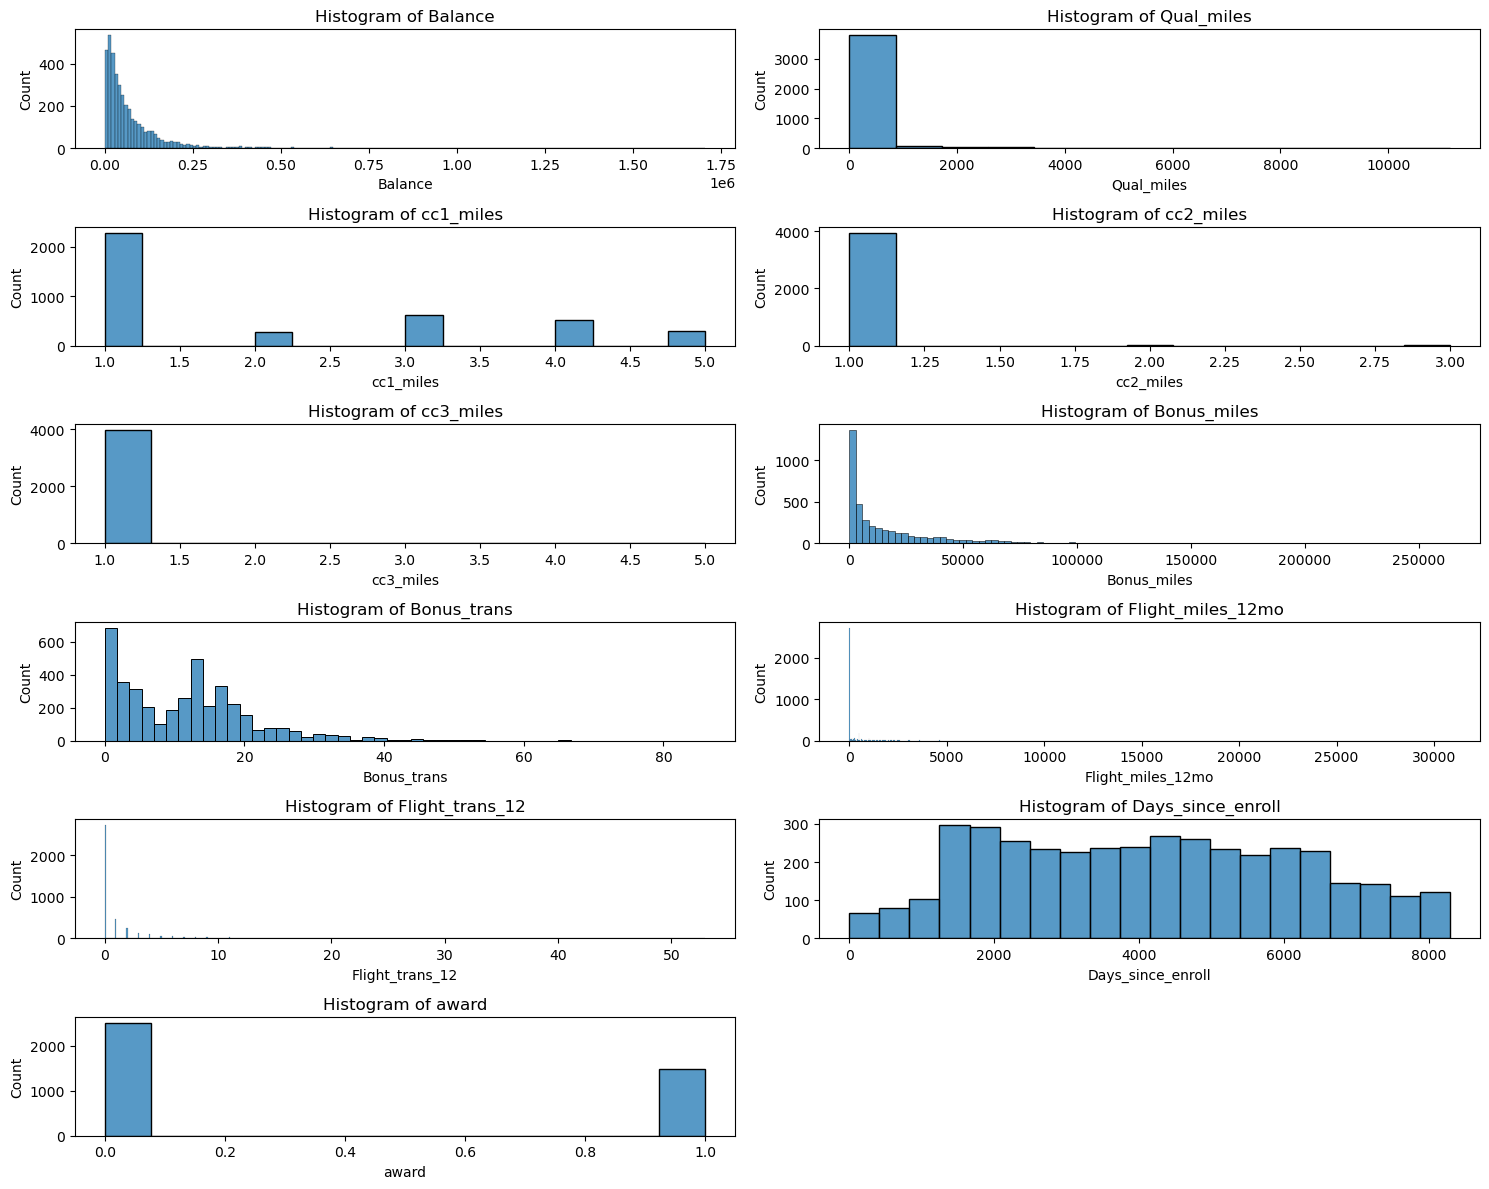

In [23]:
# Histogram for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.histplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"Histogram of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

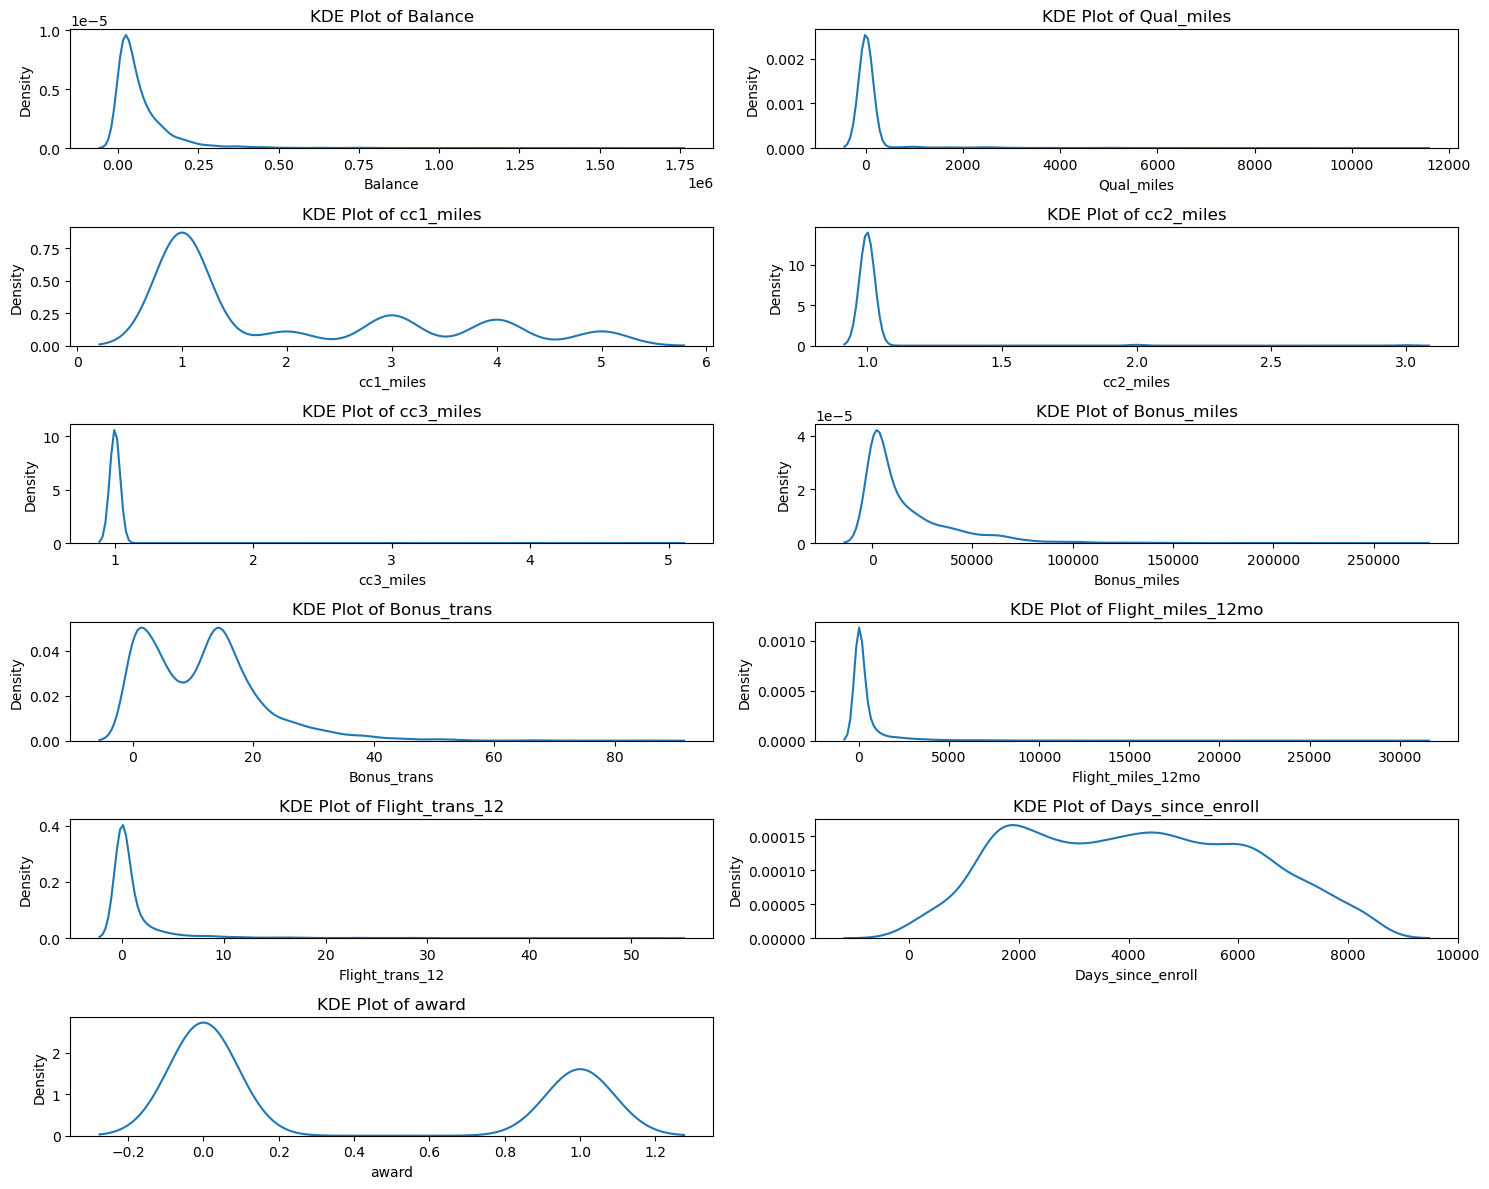

In [24]:
# kdeplot for all columns
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.kdeplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"KDE Plot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

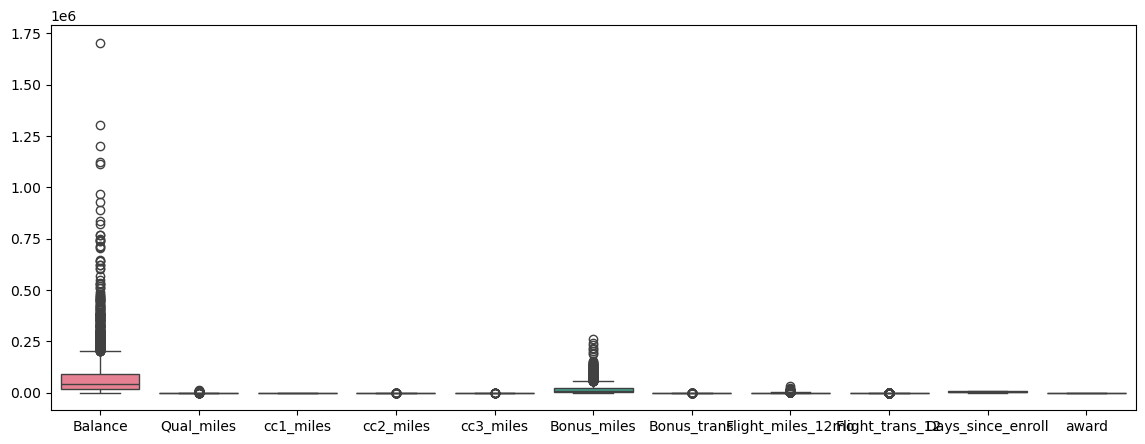

In [25]:
# boxplot for all columns
fig = plt.figure(figsize=(14,5))
sns.boxplot(data=data)
plt.show()

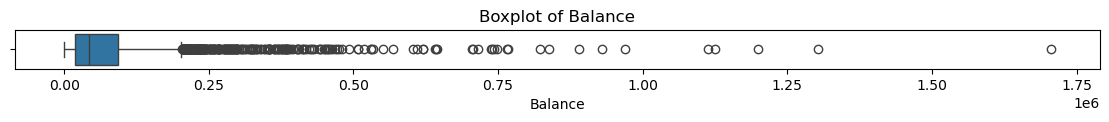

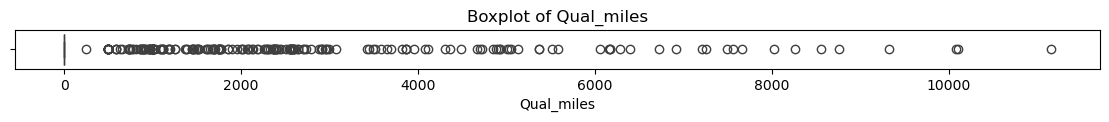

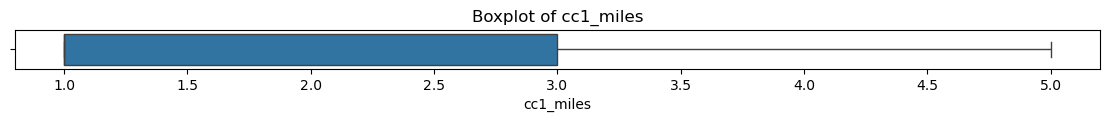

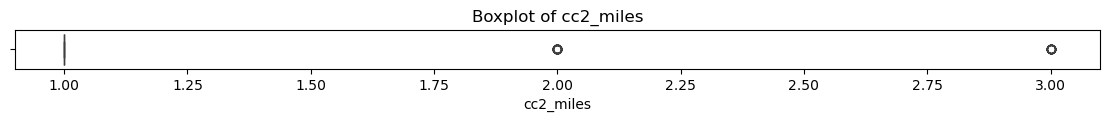

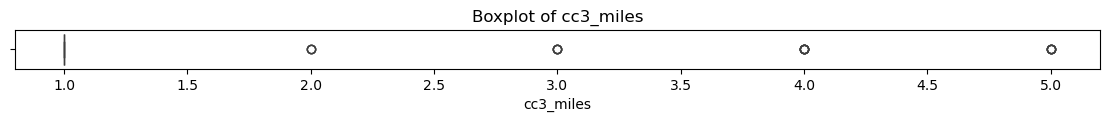

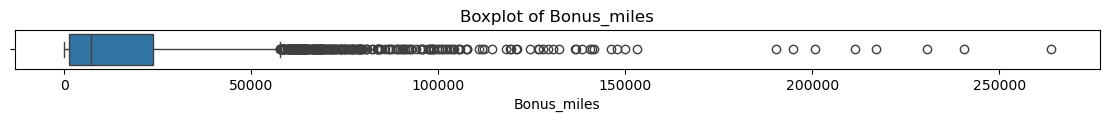

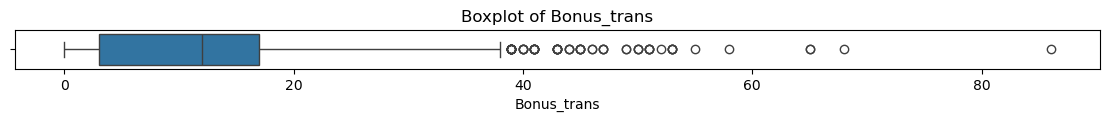

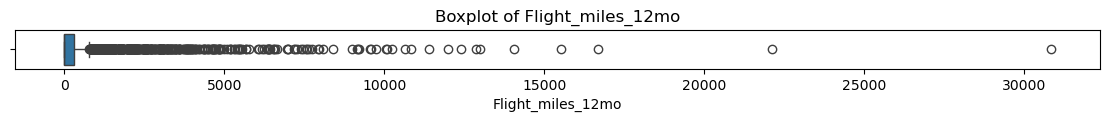

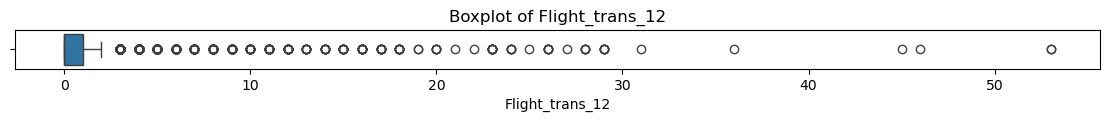

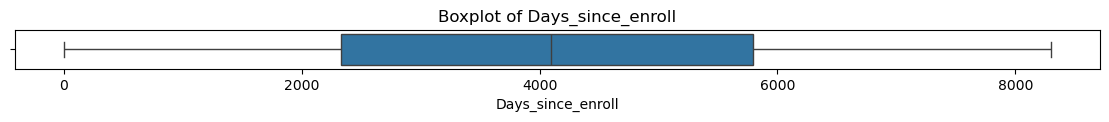

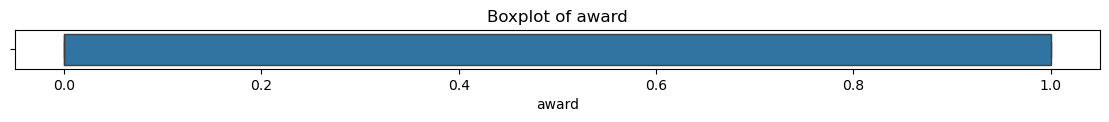

In [26]:
# seperate boxplot for each column
for column in data.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [27]:
# pairplot to see the relation between all variables
#sns.pairplot(data,hue='award')
#plt.show()

In [28]:
# correlation matrix
data.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
Balance,1.000000,0.108696,0.338252,-0.008822,0.035234,0.403410,0.324797,0.217509,0.255656,0.262975,0.178380
Qual_miles,0.108696,1.000000,0.007896,-0.013928,-0.007782,0.030990,0.050678,0.126761,0.143990,0.017259,0.095228
cc1_miles,0.338252,0.007896,1.000000,-0.068247,0.060548,0.825177,0.608867,0.037310,0.041267,0.230674,0.335358
cc2_miles,-0.008822,-0.013928,-0.068247,1.000000,-0.006168,-0.003987,0.064381,0.010590,0.028276,-0.005838,0.005314
cc3_miles,0.035234,-0.007782,0.060548,-0.006168,1.000000,0.204136,0.097312,-0.001783,-0.001122,0.010815,0.023474
Bonus_miles,0.403410,0.030990,0.825177,-0.003987,0.204136,1.000000,0.603114,0.183492,0.185211,0.210232,0.373421
Bonus_trans,0.324797,0.050678,0.608867,0.064381,0.097312,0.603114,1.000000,0.377190,0.432341,0.160953,0.333747
Flight_miles_12mo,0.217509,0.126761,0.037310,0.010590,-0.001783,0.183492,0.377190,1.000000,0.869189,0.037178,0.217671
Flight_trans_12,0.255656,0.143990,0.041267,0.028276,-0.001122,0.185211,0.432341,0.869189,1.000000,0.059161,0.247862
Days_since_enroll,0.262975,0.017259,0.230674,-0.005838,0.010815,0.210232,0.160953,0.037178,0.059161,1.000000,0.187936


In [29]:
# correlation of balance with other columns
data.corr()["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

In [30]:
# balance should be high to eligigle for award travel. Bonus_miles help the highest

In [31]:
# correlation of cc1_miles with other variables
data.corr()["cc1_miles"].sort_values(ascending=False)

cc1_miles            1.000000
Bonus_miles          0.825177
Bonus_trans          0.608867
Balance              0.338252
award                0.335358
Days_since_enroll    0.230674
cc3_miles            0.060548
Flight_trans_12      0.041267
Flight_miles_12mo    0.037310
Qual_miles           0.007896
cc2_miles           -0.068247
Name: cc1_miles, dtype: float64

In [32]:
# frequent flyer credit card earns hight from bonus_miles which are non-flight bonus transactions

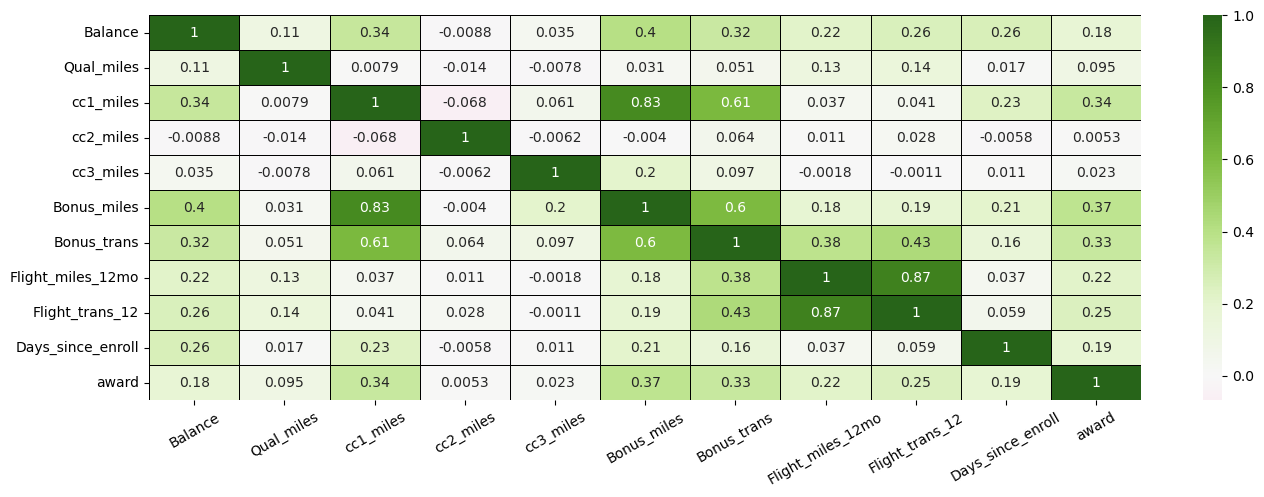

In [33]:
# correlation heatmap
fig = plt.figure(figsize=(16,5))
sns.heatmap(data.corr(),cmap='PiYG',center=0,annot=True,linewidths=0.5,linecolor='black')
plt.xticks(rotation=30)
plt.show()

In [34]:
# cc1_miles have strong positive correlation with Bonus_miles
# cc1_miles have moderate positive correlation with Bonus_trans
# Bonus_miles have moderate positive correlation with Bonus_trans
# Flight_miles_12mo have srong positive correlation with Flight_trans_12

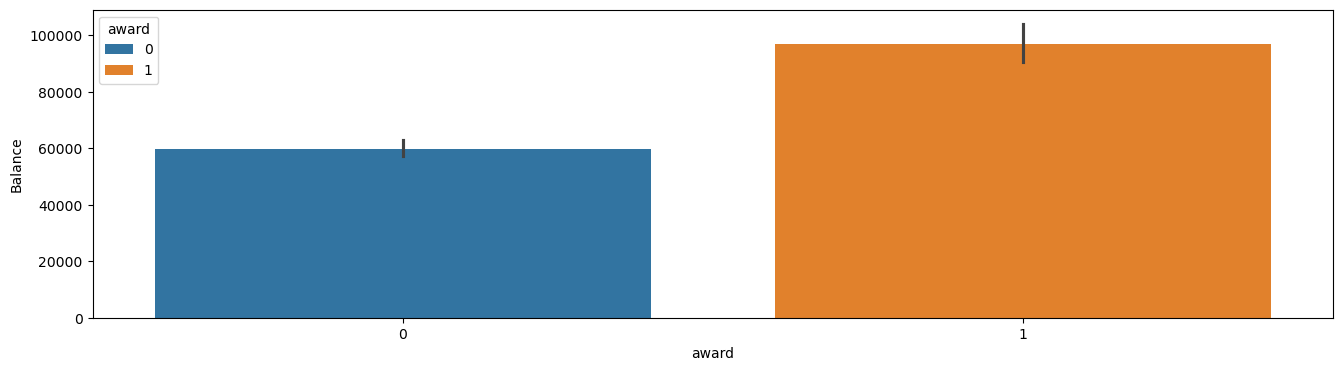

In [35]:
# barplot to show the award required for minimum balance
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='award',y='Balance',hue='award')
plt.show()

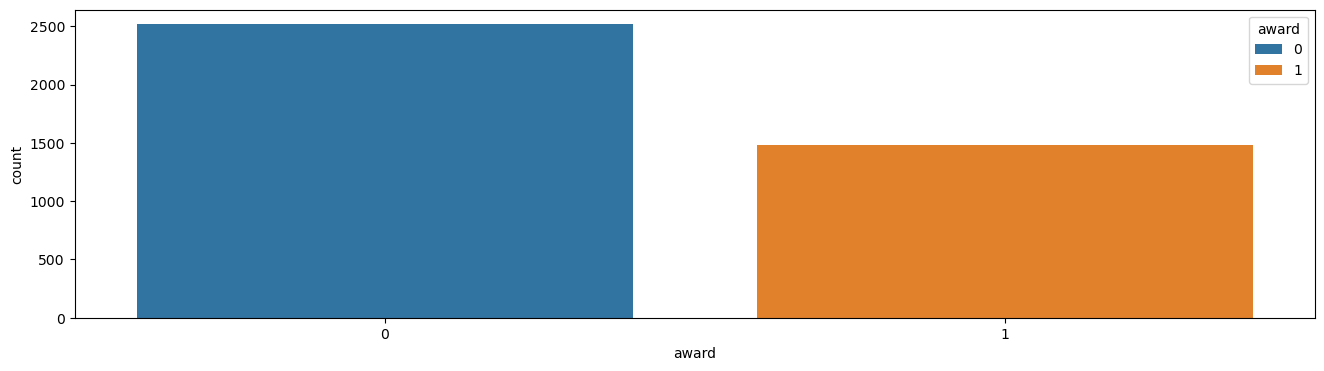

In [36]:
# countplot show the number of non award are more
fig = plt.figure(figsize=(16,4))
sns.countplot(data=data,x='award',hue='award')
plt.show()

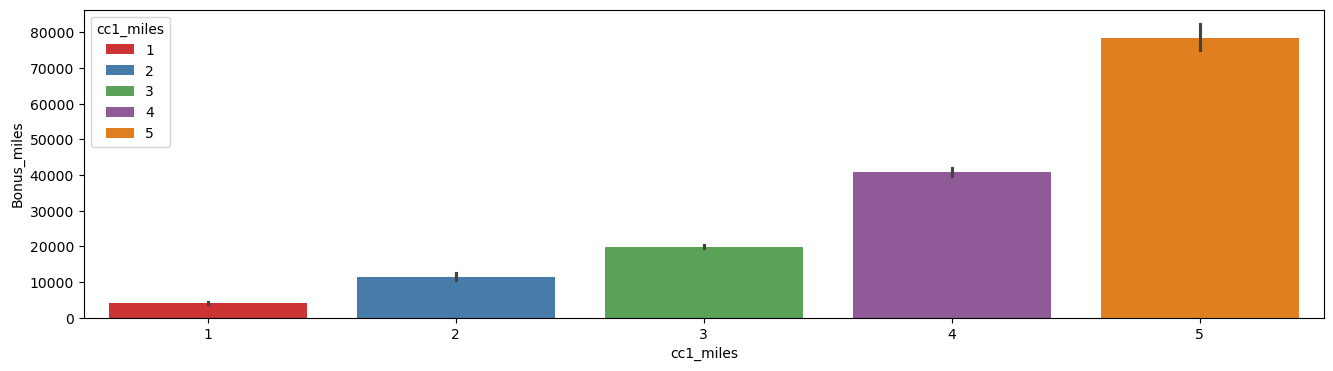

In [37]:
# barplot
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='cc1_miles',y='Bonus_miles',palette='Set1',hue='cc1_miles')
plt.show()

In [38]:
# more transaction earned by frequent flyer credit card is through non-flight bonus transcations

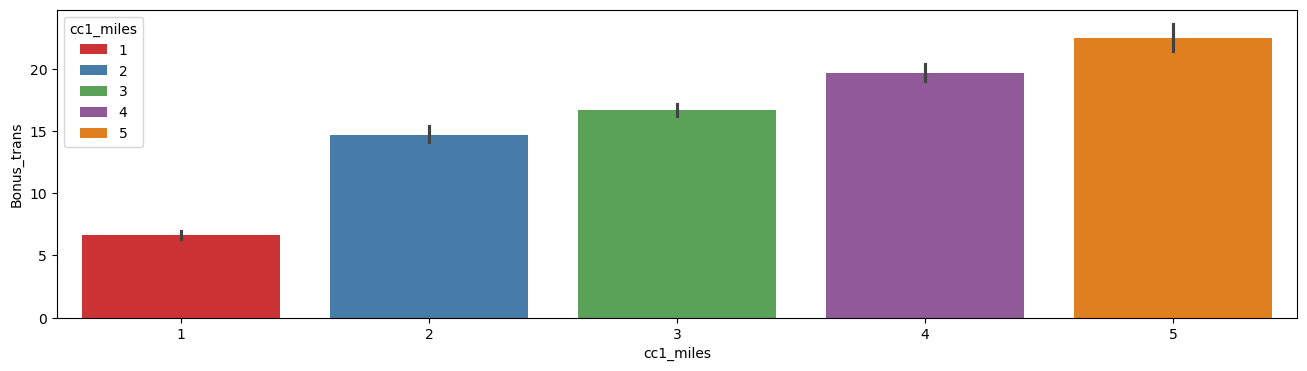

In [39]:
# barplot
fig = plt.figure(figsize=(16,4))
sns.barplot(data=data,x='cc1_miles',y='Bonus_trans',palette='Set1',hue='cc1_miles')
plt.show()

In [40]:
# more miles earned by frequent flyer credit card is by non-flight bonus transaction

In [41]:
# function to handle outliers
def handle_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        data[column] = data[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

In [42]:
# calling the function to handle outliers
handle_outliers(data, ['Balance','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12'])

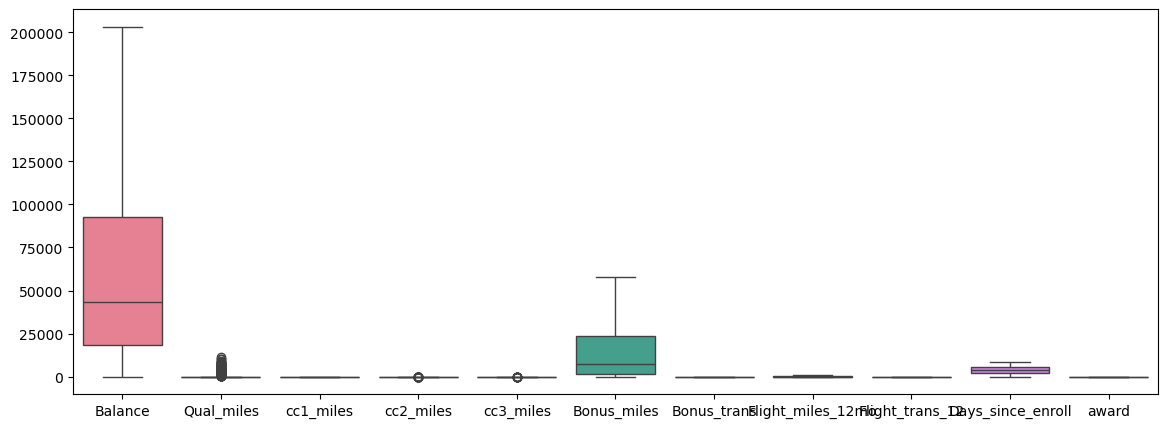

In [43]:
# boxplot for all columns after handling outliers
fig = plt.figure(figsize=(14,5))
sns.boxplot(data=data)
plt.show()

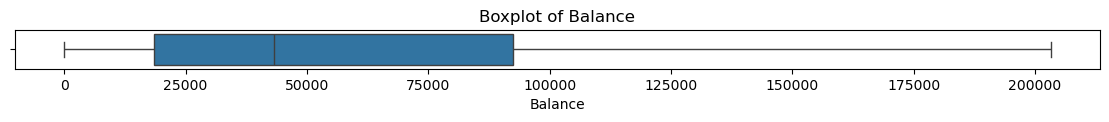

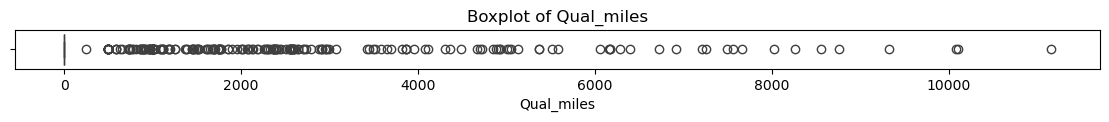

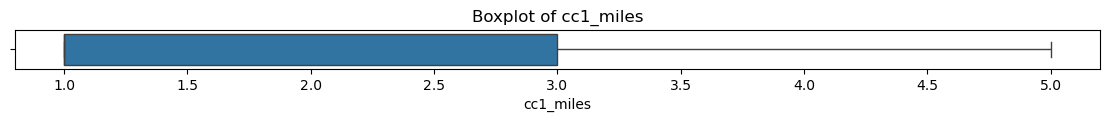

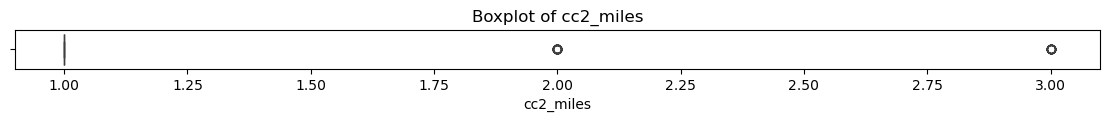

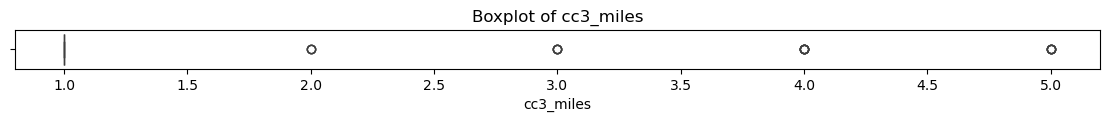

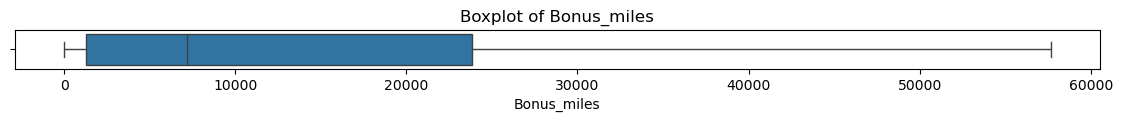

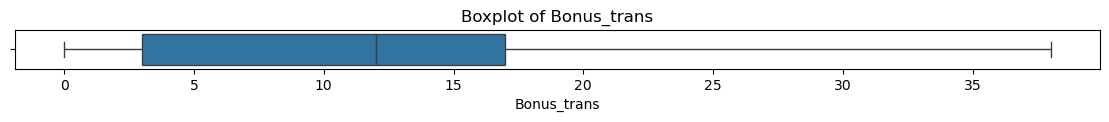

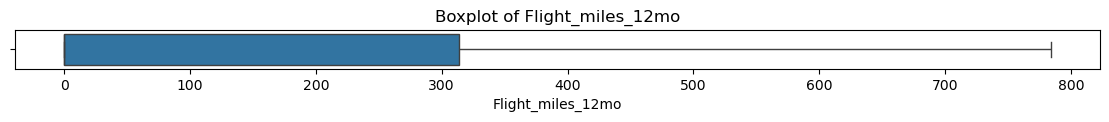

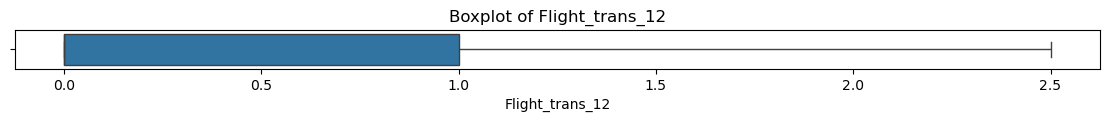

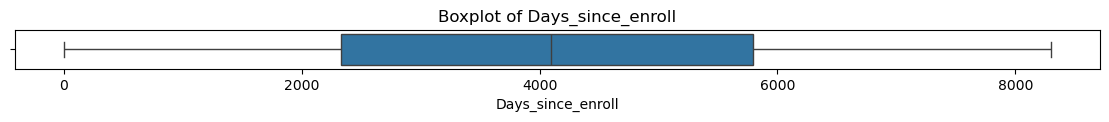

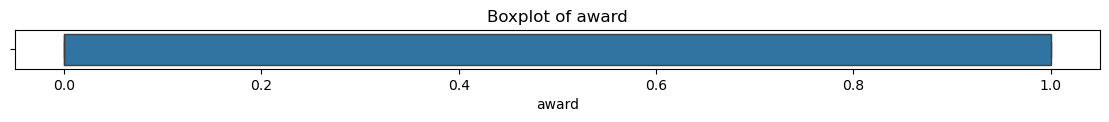

In [44]:
# seperate boxplot for each column after handling outliers
for column in data.columns:
    fig = plt.figure(figsize=(14, 0.5))
    sns.boxplot(data=data, x=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

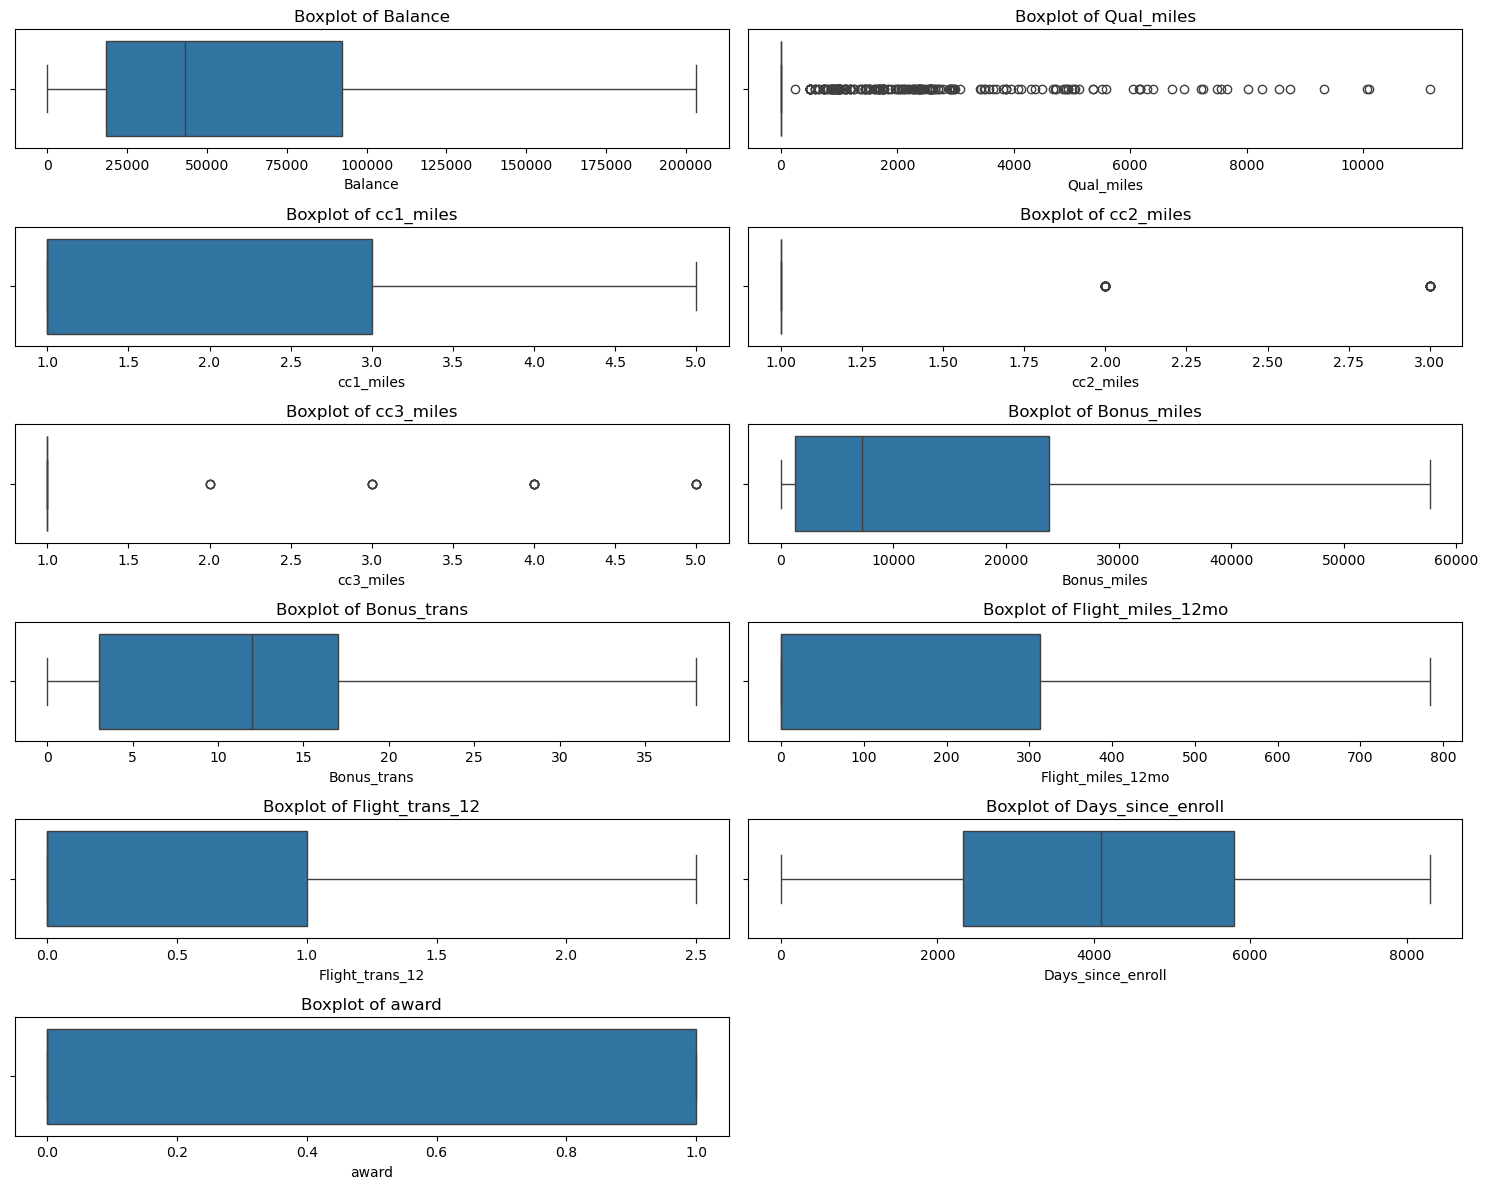

In [45]:
# boxplot for all columns after handling outliers
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows required

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 2 * n_rows))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot of {column}")

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [46]:
# scaling the data using standard scaler
standard_scaler = StandardScaler()
standard_scaled_data = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

In [47]:
# scaling the data using minmax scaler
minmax_scaler = MinMaxScaler()
minmax_scaled_data = pd.DataFrame(minmax_scaler.fit_transform(data), columns=data.columns)

In [48]:
# checking the data after scaling
standard_scaled_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,-0.607541,-0.186323,-0.769732,-0.098254,-0.062774,-0.843179,-1.149253,-0.603723,-0.626252,1.395235,-0.767072
1,-0.759235,-0.186323,-0.769732,-0.098254,-0.062774,-0.840911,-1.039523,-0.603723,-0.626252,1.379736,-0.767072


In [49]:
# checking the data after scaling
minmax_scaled_data.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
0,0.138491,0.0,0.0,0.0,0.0,0.003018,0.026316,0.0,0.0,0.843742,0.0
1,0.094700,0.0,0.0,0.0,0.0,0.003729,0.052632,0.0,0.0,0.839884,0.0


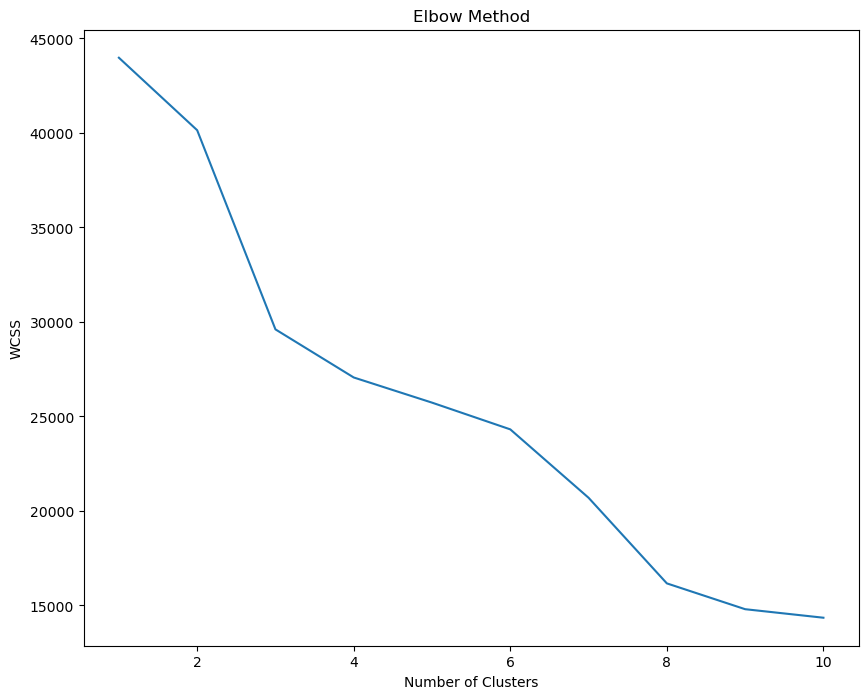

In [50]:
# finding the optimal number of cluster using elbow method for KMeans clustering
fig = plt.figure(figsize=(10,8))
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(standard_scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# 5 clusters are seem to be optimal

In [52]:
# building model with 5 clusters on standard scaled data
clusters_kmeans = KMeans(5)
clusters_kmeans.fit(standard_scaled_data)

KMeans(n_clusters=5)

In [53]:
clusters_kmeans.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [54]:
# create copy of data and storing the cluster values in seperate column
data_kmeans = data.copy()
data_kmeans['clusters_kmeans'] = clusters_kmeans.labels_

In [55]:
data_kmeans.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award,clusters_kmeans
0,28143.0,0,1,1,1,174.0,1.0,0.0,0.0,7000,0,0
1,19244.0,0,1,1,1,215.0,2.0,0.0,0.0,6968,0,0


In [56]:
# checking the mean
data_kmeans.groupby('clusters_kmeans').mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_kmeans,,,,,,,,,,,
0,32722.559530,58.052322,1.129738,1.000000,1.000534,3310.439402,5.853177,15.185264,0.074212,3562.785905,0.146823
1,125238.195214,354.428212,4.062972,1.000000,1.115869,45463.382242,24.876574,623.599496,1.979849,5031.483627,0.788413
2,55180.938953,23.255814,1.139535,2.348837,1.000000,14410.369186,17.139535,210.069767,0.755814,3968.930233,0.395349
3,88235.582474,64.354264,3.463918,1.000000,1.001874,29979.296743,16.722587,29.154639,0.116214,4758.351453,0.521087
4,76826.346076,416.194175,1.231392,1.000000,1.000000,7730.915655,10.440129,646.357201,2.077670,4126.375405,0.517799


In [57]:
# checking the number of values for each unique value
data_kmeans['clusters_kmeans'].value_counts()

clusters_kmeans
0    1873
3    1067
4     618
1     397
2      43
Name: count, dtype: int64

In [58]:
# checking the silhouette score
silhouette_score(standard_scaled_data, clusters_kmeans.labels_)

0.28826235915971565

In [59]:
# silhouette score seems to be good

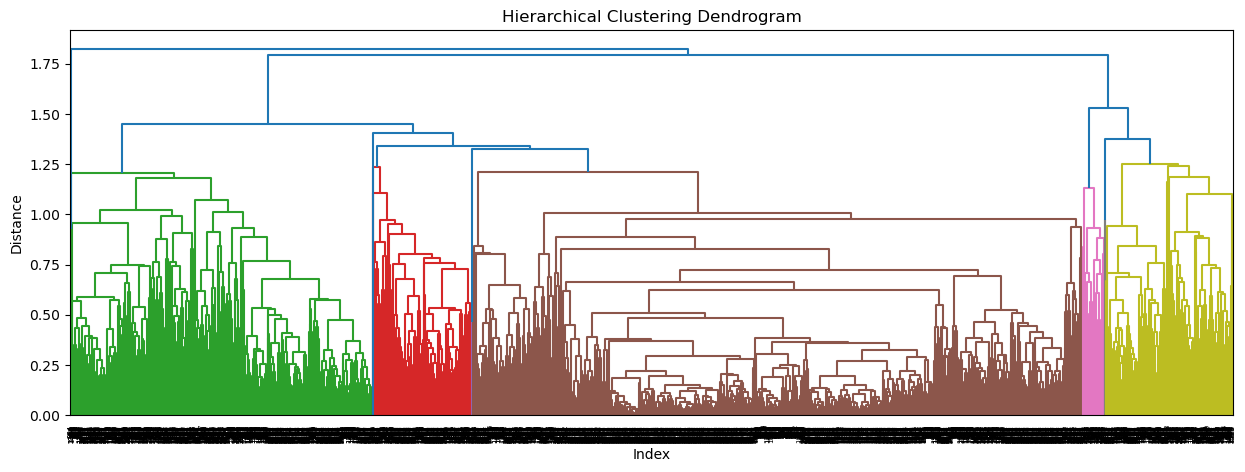

In [60]:
# hierarchical clustering with average method
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(minmax_scaled_data, method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [61]:
# hierarchical clustering with average linkage
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=6, linkage='average').fit(minmax_scaled_data)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

0       2
1       2
2       2
3       2
4       0
       ..
3993    1
3994    1
3995    1
3996    2
3997    2
Length: 3998, dtype: int64

In [62]:
data_h_avg = data.copy()
data_h_avg['clusters_h_avg'] = cluster_labels

In [63]:
data_h_avg.groupby(['clusters_h_avg']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_avg,,,,,,,,,,,
0,103142.355159,479.294785,2.557823,1.029478,1.034014,27752.922902,19.873016,761.603741,2.385488,4825.263039,1.0
1,65707.336909,139.211186,2.702025,1.009643,1.000964,23307.215043,13.588235,93.539296,0.358245,4537.515911,1.0
2,52915.627916,82.482603,1.632828,1.013508,1.006549,8903.476361,8.733115,98.665984,0.334220,3782.225133,0.0
3,50703.000000,0.000000,4.000000,1.000000,4.666667,57651.875000,24.000000,0.000000,0.000000,5457.333333,1.0
4,161517.825342,261.342466,4.150685,1.000000,1.082192,45013.708904,21.863014,571.126712,1.719178,5093.630137,0.0
5,167670.000000,0.000000,1.000000,3.000000,1.000000,15907.000000,13.000000,0.000000,0.000000,6994.000000,0.0


In [64]:
data_h_avg['clusters_h_avg'].value_counts()

clusters_h_avg
2    2443
1    1037
0     441
4      73
3       3
5       1
Name: count, dtype: int64

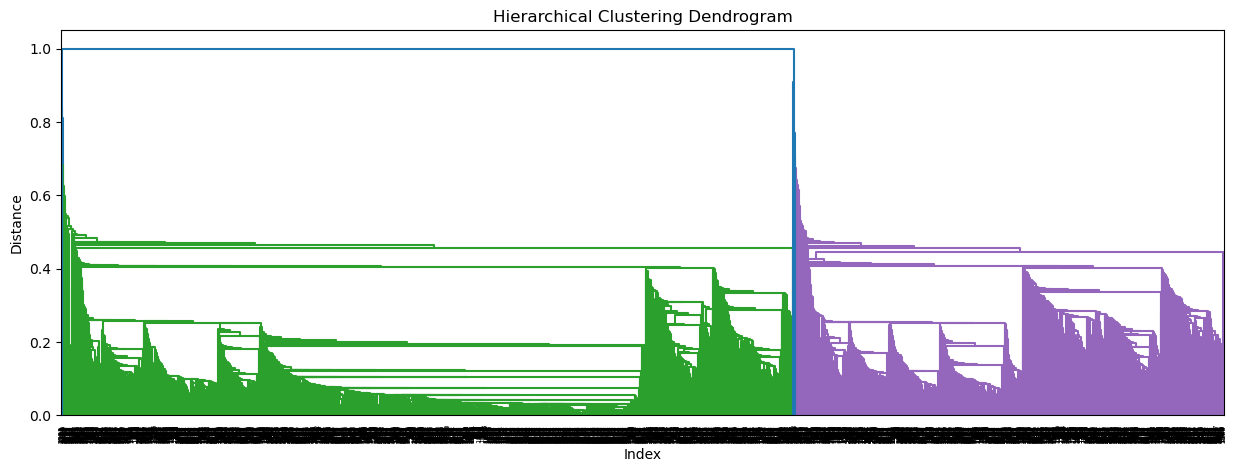

In [65]:
# hierarchical clustering with single method
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(minmax_scaled_data, method='single',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [66]:
# hierarchical clustering with single linkage
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3, linkage='single').fit(minmax_scaled_data)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

0       0
1       0
2       0
3       0
4       2
       ..
3993    2
3994    2
3995    2
3996    0
3997    0
Length: 3998, dtype: int64

In [67]:
data_h_sin = data.copy()
data_h_sin['clusters_h_sin'] = cluster_labels

In [68]:
data_h_sin.groupby(['clusters_h_sin']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_sin,,,,,,,,,,,
0,56110.985399,87.637267,1.705602,1.013905,1.008741,9953.556019,9.115614,112.329460,0.374255,3821.535558,0.0
1,15835.000000,0.000000,2.000000,1.000000,5.000000,57651.875000,16.000000,0.000000,0.000000,5825.000000,1.0
2,76865.243919,240.358784,2.662162,1.015541,1.015541,24678.327534,15.480405,292.478041,0.961824,4624.251351,1.0


In [69]:
data_h_sin['clusters_h_sin'].value_counts()

clusters_h_sin
0    2517
2    1480
1       1
Name: count, dtype: int64

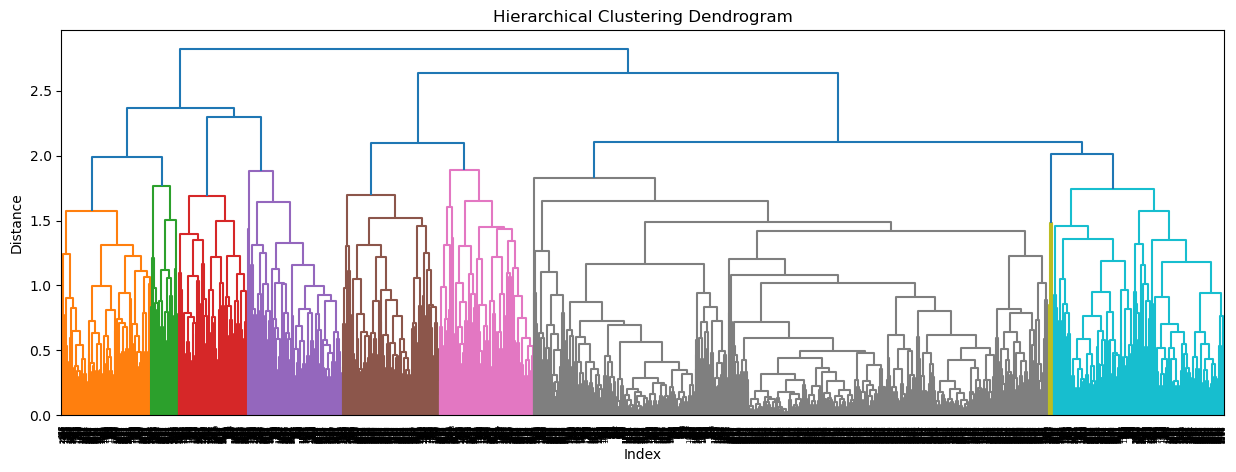

In [70]:
# hierarchical clustering with complete method
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(minmax_scaled_data, method='complete',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [71]:
# hierarchical clustering with complete linkage
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=9, linkage='complete').fit(minmax_scaled_data)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

0       2
1       2
2       2
3       2
4       4
       ..
3993    3
3994    3
3995    3
3996    6
3997    2
Length: 3998, dtype: int64

In [72]:
data_h_com = data.copy()
data_h_com['clusters_h_com'] = cluster_labels

In [73]:
data_h_com.groupby(['clusters_h_com']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_com,,,,,,,,,,,
0,87723.097136,444.820433,1.123839,1.040248,1.006192,10177.289474,12.430341,641.854489,2.106811,4367.588235,1.0000
1,89558.671012,121.260736,4.361963,1.000000,1.070552,47316.267255,18.953988,90.092025,0.355828,5033.411043,1.0000
2,38275.589659,68.933973,1.296840,1.007336,1.004515,4702.192932,7.034424,8.709368,0.053894,3613.150113,0.0000
3,48520.390572,139.764505,2.022184,1.001706,1.000000,12673.436860,11.293515,31.020478,0.136519,4331.675768,1.0000
4,115489.937238,379.167364,4.037657,1.000000,1.008368,43420.828452,25.154812,744.771967,2.288703,5106.548117,1.0000
5,119523.378989,202.957447,3.808511,1.000000,1.063830,37666.988032,19.670213,512.587766,1.521277,3949.712766,0.0000
6,65047.834084,202.621622,1.285285,1.009009,1.000000,6064.423423,9.696697,636.297297,2.028529,3868.633634,0.0000
7,41908.062500,0.000000,1.000000,2.687500,1.000000,12815.750000,14.500000,25.000000,0.125000,4481.125000,0.4375
8,129614.935275,38.449838,3.883495,1.003236,1.025890,35665.403722,17.061489,22.103560,0.084142,4933.152104,0.0000


In [74]:
data_h_com['clusters_h_com'].value_counts()

clusters_h_com
2    1772
3     586
6     333
1     326
0     323
8     309
4     239
5      94
7      16
Name: count, dtype: int64

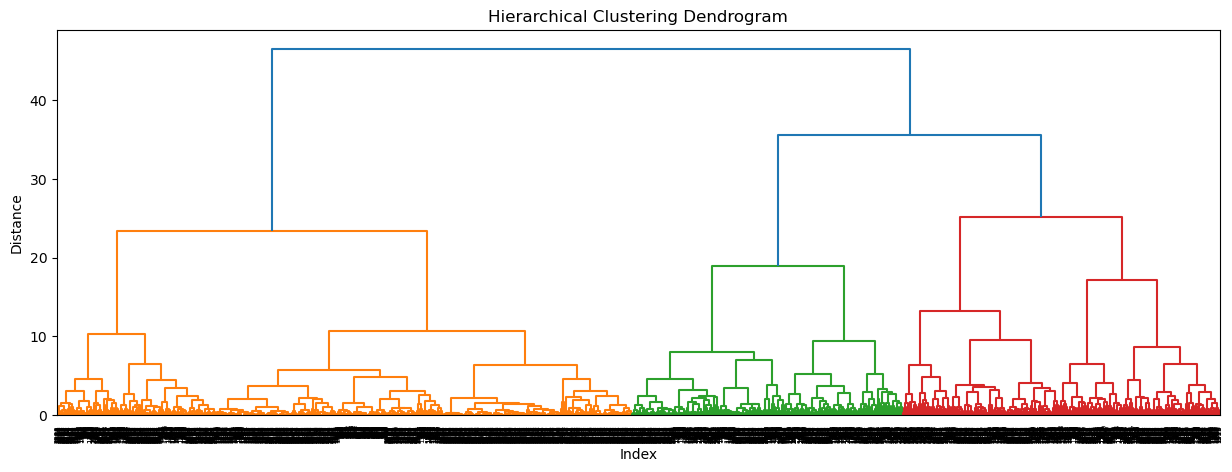

In [75]:
# hierarchical clustering with complete method
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z = linkage(minmax_scaled_data, method='ward',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()

In [76]:
# hierarchical clustering with complete linkage
from sklearn.cluster import AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(minmax_scaled_data)

cluster_labels = pd.Series(h_complete.labels_)
cluster_labels

0       1
1       1
2       1
3       1
4       0
       ..
3993    0
3994    2
3995    2
3996    0
3997    1
Length: 3998, dtype: int64

In [77]:
data_h_war = data.copy()
data_h_war['clusters_h_war'] = cluster_labels

In [78]:
data_h_war.groupby(['clusters_h_war']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,award
clusters_h_war,,,,,,,,,,,
0,88507.410041,299.825368,2.028493,1.015625,1.007353,17666.062500,14.363051,601.352022,1.956801,4319.740809,0.504596
1,49971.354398,65.773003,1.682508,1.015672,1.008089,9358.202035,8.489383,0.589990,0.003033,3771.920627,0.000000
2,64236.421808,128.760730,2.896996,1.010730,1.026824,25647.508047,14.433476,64.552307,0.247318,4622.086910,1.000000


In [79]:
data_h_war['clusters_h_war'].value_counts()

clusters_h_war
1    1978
0    1088
2     932
Name: count, dtype: int64

In [80]:
# in hierarchical clustering linkage complete gave the good result in terms of number of clusters